
# **EXPLORATORY DATA ANALYSIS - RETAIL**

DATASET : SAMPLESUPERSTORE.CSV (https://bit.ly/3i4rbWl)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
dat = pd.read_csv("SampleSuperstore.csv")
dat.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
dat.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
dat.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
sum(dat.duplicated(subset = None, keep = 'first'))

17

In [ ]:
dat.drop_duplicates(subset=None, keep= 'first', inplace= True)

In [ ]:
dat.shape

(9977, 13)

In [ ]:
Sales_and_Profits = dat.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2)

Sales     2296195.59
Profit     286241.42
dtype: float64

In [ ]:
dat.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# **Pairplot Analysis**

**Heatmap for correlations**

In [ ]:
dat.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


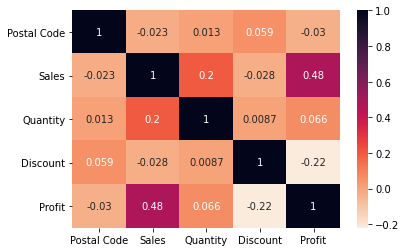

In [ ]:
sns.heatmap(dat.corr(), cmap= 'rocket_r', annot= True)

# **Count plots**

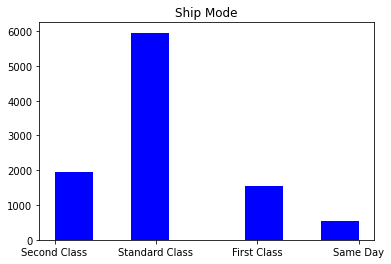

In [ ]:
num_bins = 8
plt.hist(dat['Ship Mode'], num_bins, facecolor ='blue')
plt.title('Ship Mode')
plt.show()

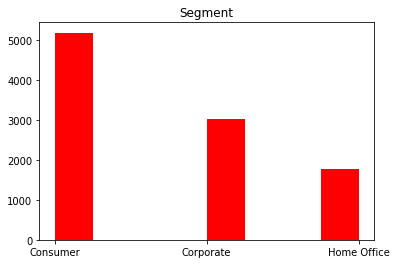

In [ ]:
num_bins = 8
plt.hist(dat['Segment'], num_bins, facecolor ='Red')
plt.title('Segment')
plt.show()

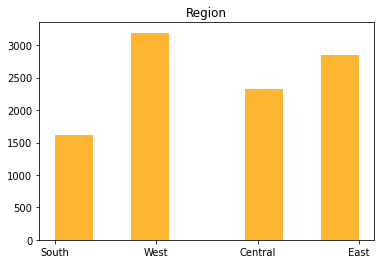

In [ ]:
num_bins = 8
plt.hist(dat['Region'], num_bins, facecolor ='orange' , alpha = 0.8)
plt.title('Region')
plt.show()

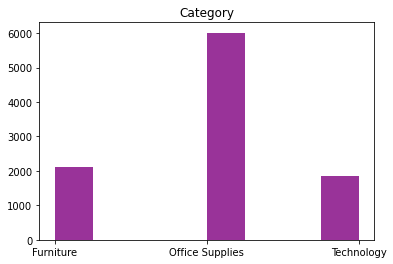

In [ ]:
num_bins = 8
plt.hist(dat['Category'], num_bins, facecolor ='purple' , alpha = 0.8)
plt.title('Category')
plt.show()

In [ ]:
sales_by_region = dat.groupby('Region').size()
print(sales_by_region)

Region
Central    2319
East       2845
South      1620
West       3193
dtype: int64


Text(0.5, 1.0, 'Sub-Category')

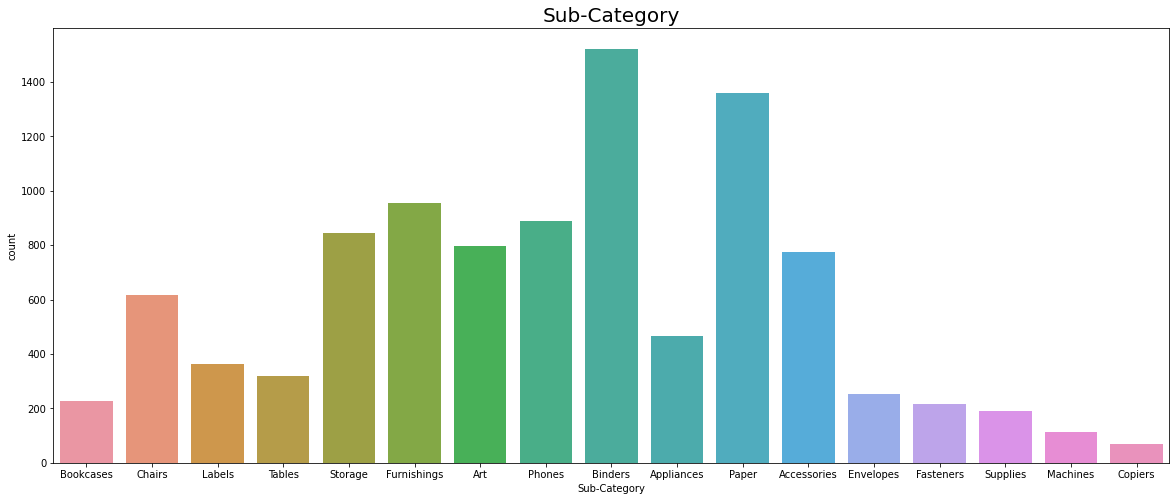

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(dat['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

Text(0.5, 1.0, 'Quantity')

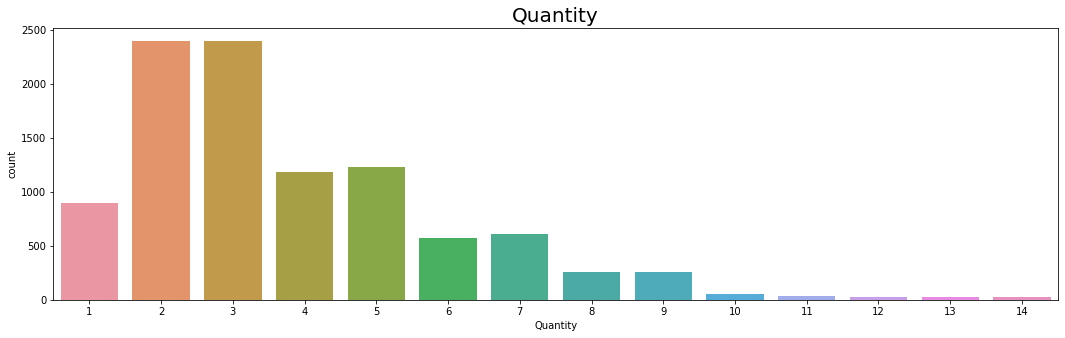

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(dat['Quantity'])
plt.title('Quantity',fontsize=20)

Text(0.5, 1.0, 'Discount')

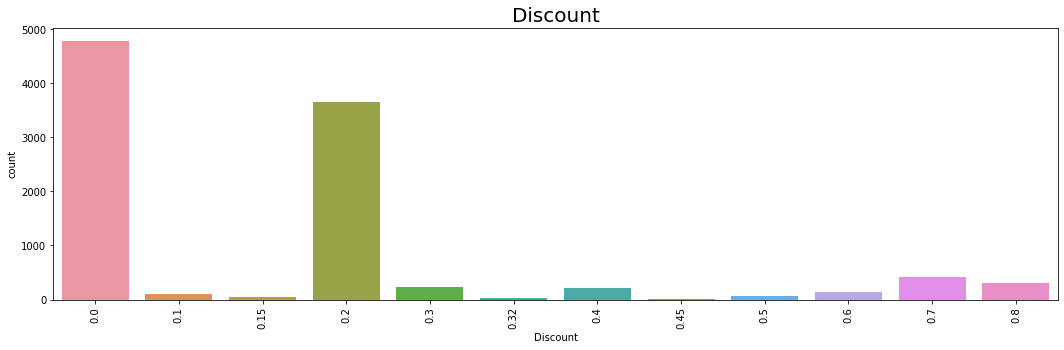

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(dat['Discount'])
plt.xticks(rotation=90)
plt.title('Discount',fontsize=20)

# **Statewise Deals Analysis**

In [ ]:
State_deals = dat['State'].value_counts()
State_deals.head(10)

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

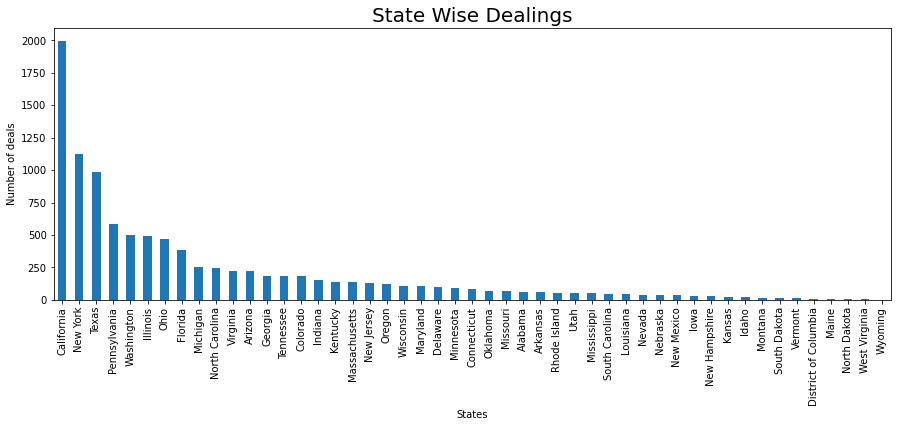

In [ ]:
State_deals.plot(kind='bar',figsize=(15,5))
plt.ylabel('Number of deals')
plt.xlabel('States')
plt.title('State Wise Dealings', fontsize = 20)
plt.show()

**California** is the highest number of deals conquering state followed by **New York**.

**Wyoming** is the worst deal performer statewise.

In [ ]:
dat['State'].value_counts().mean()

203.6122448979592

# **Citywise Deals Analysis**

In [ ]:
City_deals = dat['City'].value_counts()
City_deals=City_deals.head(50)

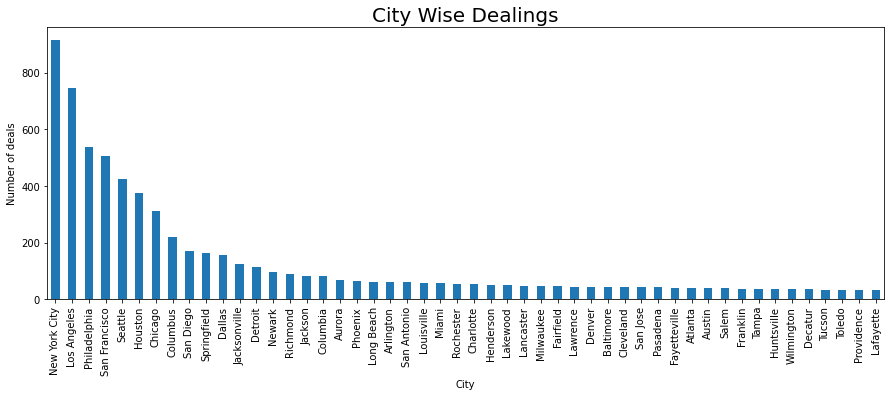

In [ ]:
City_deals.plot(kind='bar',figsize=(15,5))
plt.ylabel('Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

In [ ]:
dat['City'].value_counts().mean()

18.821092278719398

In [ ]:
dat['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [ ]:
Segment_data = dat.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
Segment_data

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sales, Discount, Profit')

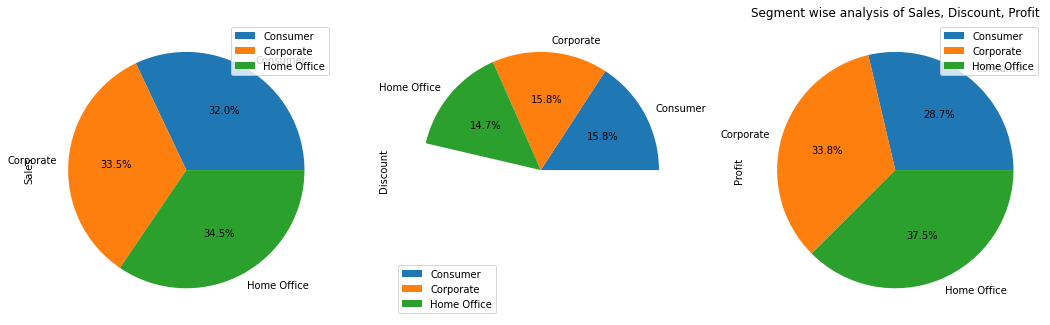

In [ ]:
Segment_data.plot.pie(subplots = True, autopct='%1.1f%%', figsize = (18, 20), labels= Segment_data.index)
plt.title('Segment wise analysis of Sales, Discount, Profit')

In [ ]:
dat['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [ ]:
State_data= dat.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
State_data.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


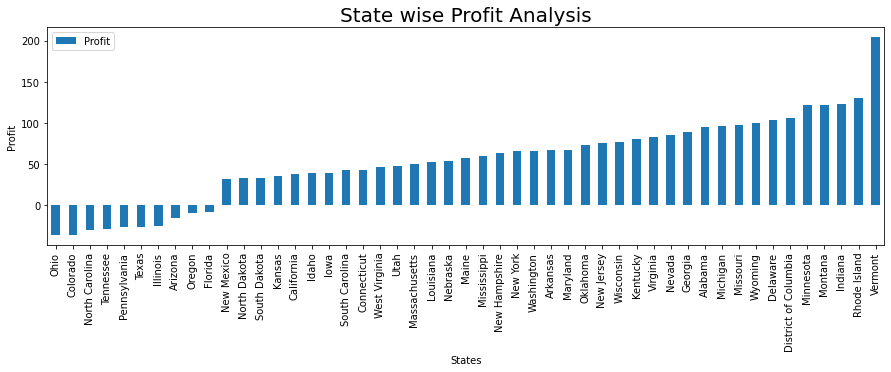

In [ ]:
State_data1 = State_data.sort_values('Profit')

State_data1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit')
plt.xlabel('States')
plt.show()

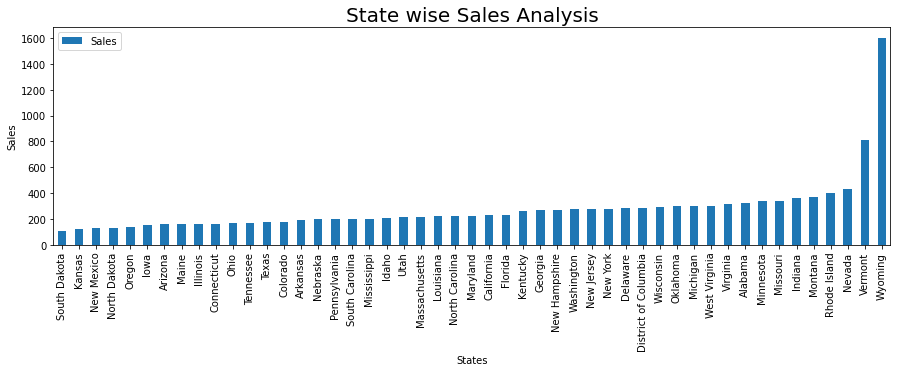

In [ ]:
State_data2 = State_data.sort_values('Sales')

State_data2[['Sales']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Sales Analysis', fontsize = 20)
plt.ylabel('Sales')
plt.xlabel('States')
plt.show()

Text(0.5, 1.0, 'State wise analysis of Sale')

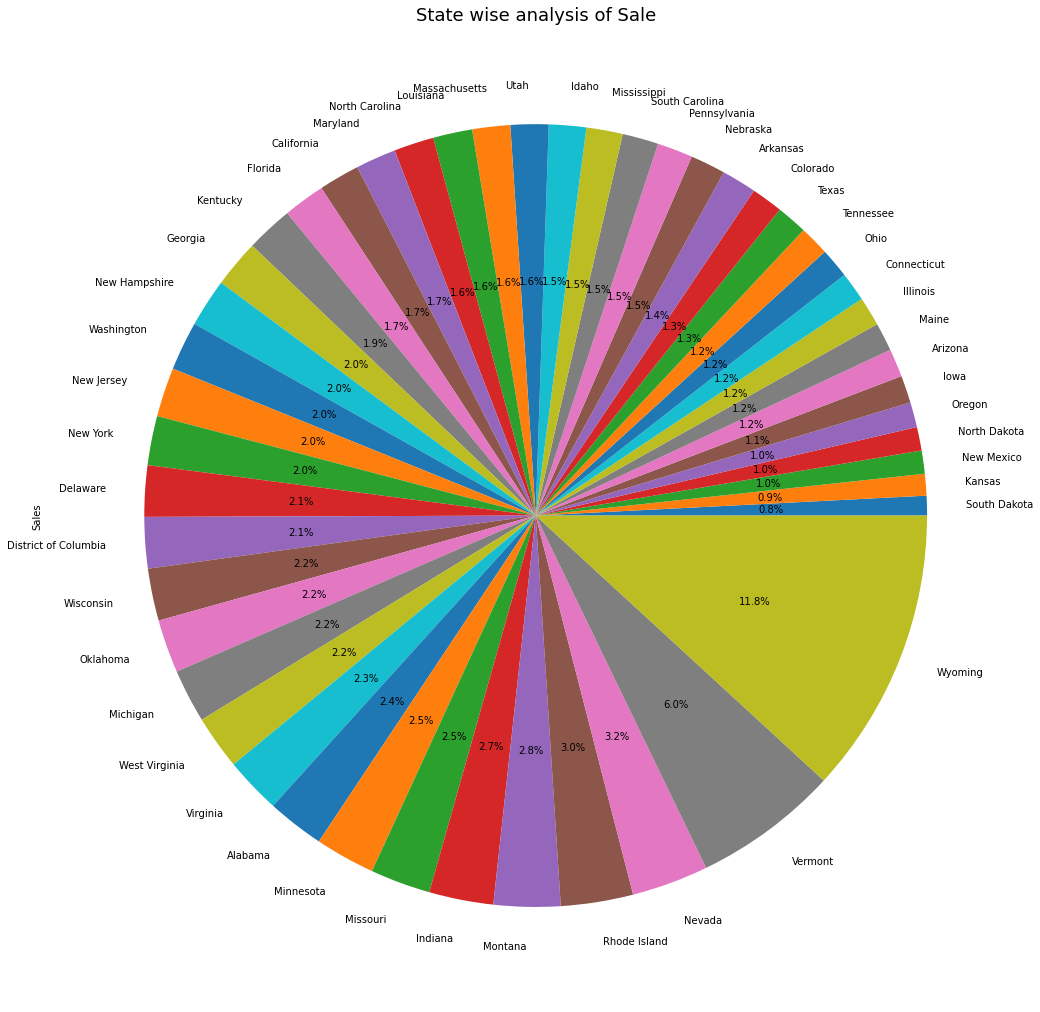

In [ ]:
State_data2['Sales'].plot(kind='pie',figsize = (18,18), autopct='%1.1f%%')
plt.title('State wise analysis of Sale',fontsize=18)

Text(0.5, 1.0, 'State wise analysis of Discount')

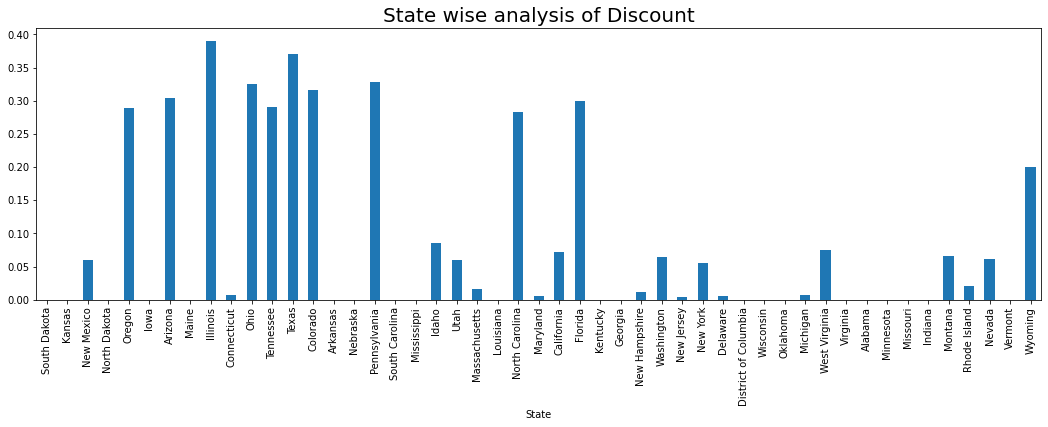

In [ ]:
State_data2['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount', fontsize=20)

In [ ]:
City_data = dat.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
City_data = City_data.sort_values('Profit')
City_data.head(10)

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052
Clarksville,316.818571,0.271429,-150.764743
Medina,275.302444,0.433333,-149.227178
Burlington,866.723280,0.136000,-144.915088
San Antonio,370.229288,0.383051,-123.712715


Text(0.5, 1.0, 'Lowest 50 City profits')

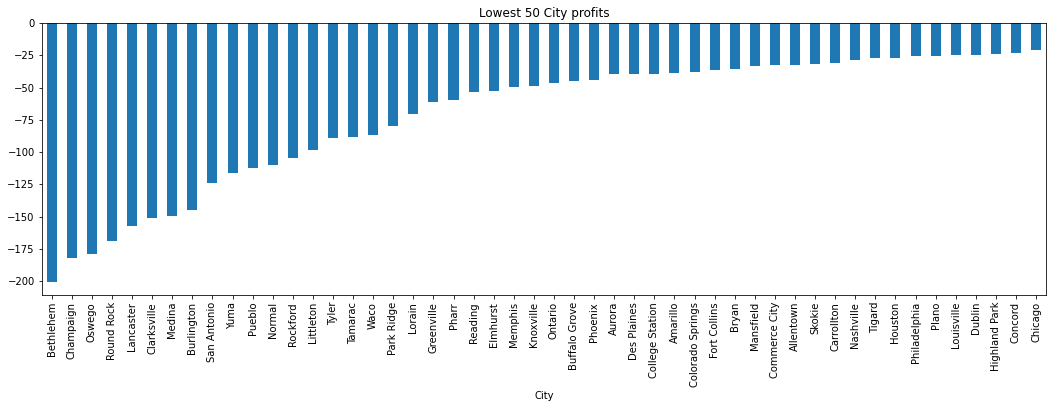

In [ ]:
City_data['Profit'].head(50).plot(kind = 'bar', figsize = (18,5))
plt.title('Lowest profit generating 50 Cities')

Text(0.5, 1.0, 'Highest profit generating 50 Cities')

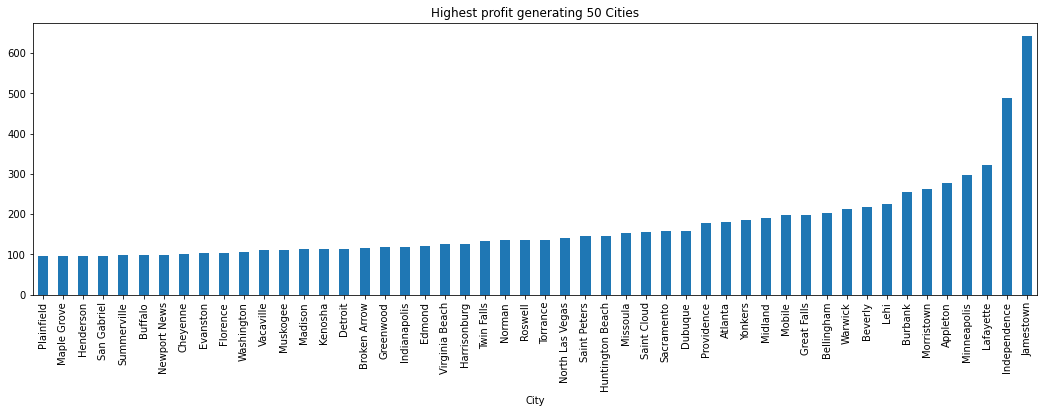

In [ ]:
City_data['Profit'].tail(50).plot(kind = 'bar', figsize = (18,5))
plt.title('Highest profit generating 50 Cities')

In [ ]:
Category_data = dat.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
Category_data

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


Text(0.5, 1.0, 'Category wise analysis of Sales, Discount, Profit')

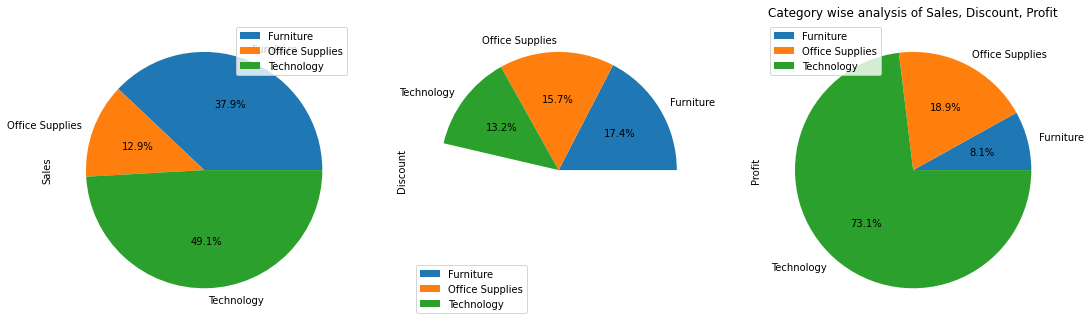

In [ ]:
Category_data.plot.pie(subplots = True, autopct='%1.1f%%', figsize = (18, 20), labels= Category_data.index)
plt.title('Category wise analysis of Sales, Discount, Profit')

In [ ]:
SubCategory_data = dat.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
SubCategory_data

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


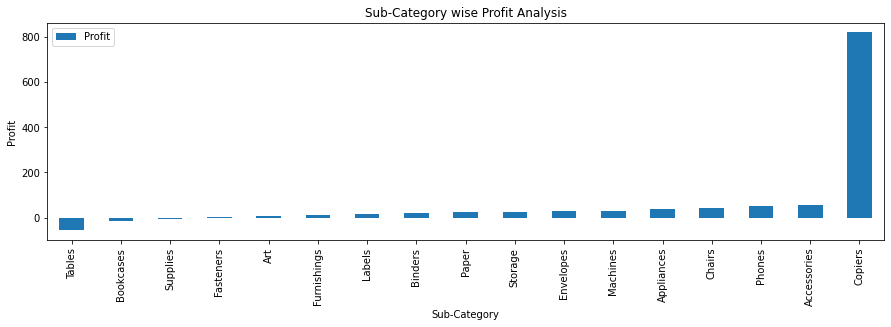

In [ ]:
SubCategory_data2 = SubCategory_data.sort_values('Profit')

SubCategory_data2[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('Sub-Category wise Profit Analysis')
plt.ylabel('Profit')
plt.xlabel('Sub-Category')
plt.show()

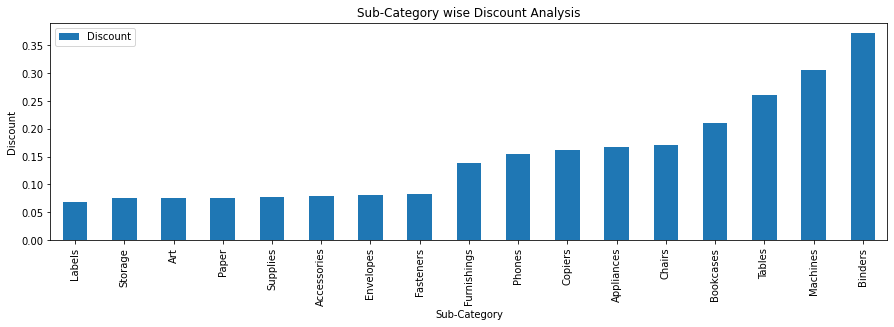

In [ ]:
SubCategory_data2 = SubCategory_data.sort_values('Discount')

SubCategory_data2[['Discount']].plot(kind = 'bar', figsize = (15,4))
plt.title('Sub-Category wise Discount Analysis')
plt.ylabel('Discount')
plt.xlabel('Sub-Category')
plt.show()

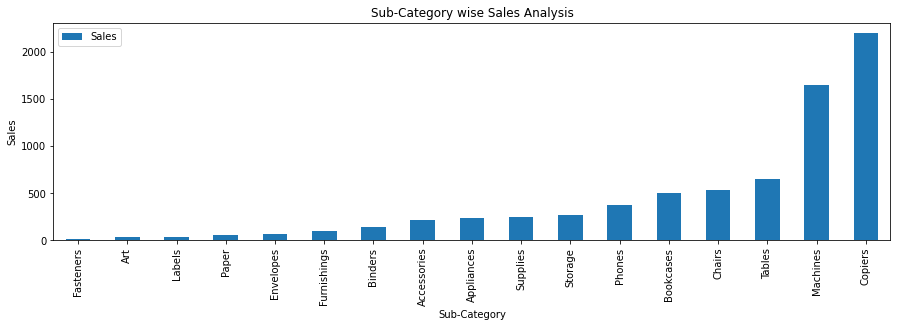

In [ ]:
SubCategory_data1 = SubCategory_data.sort_values('Sales')

SubCategory_data1[['Sales']].plot(kind = 'bar', figsize = (15,4))
plt.title('Sub-Category wise Sales Analysis')
plt.ylabel('Sales')
plt.xlabel('Sub-Category')
plt.show()

Text(0.5, 1.0, 'Sub-Category wise analysis of Sales')

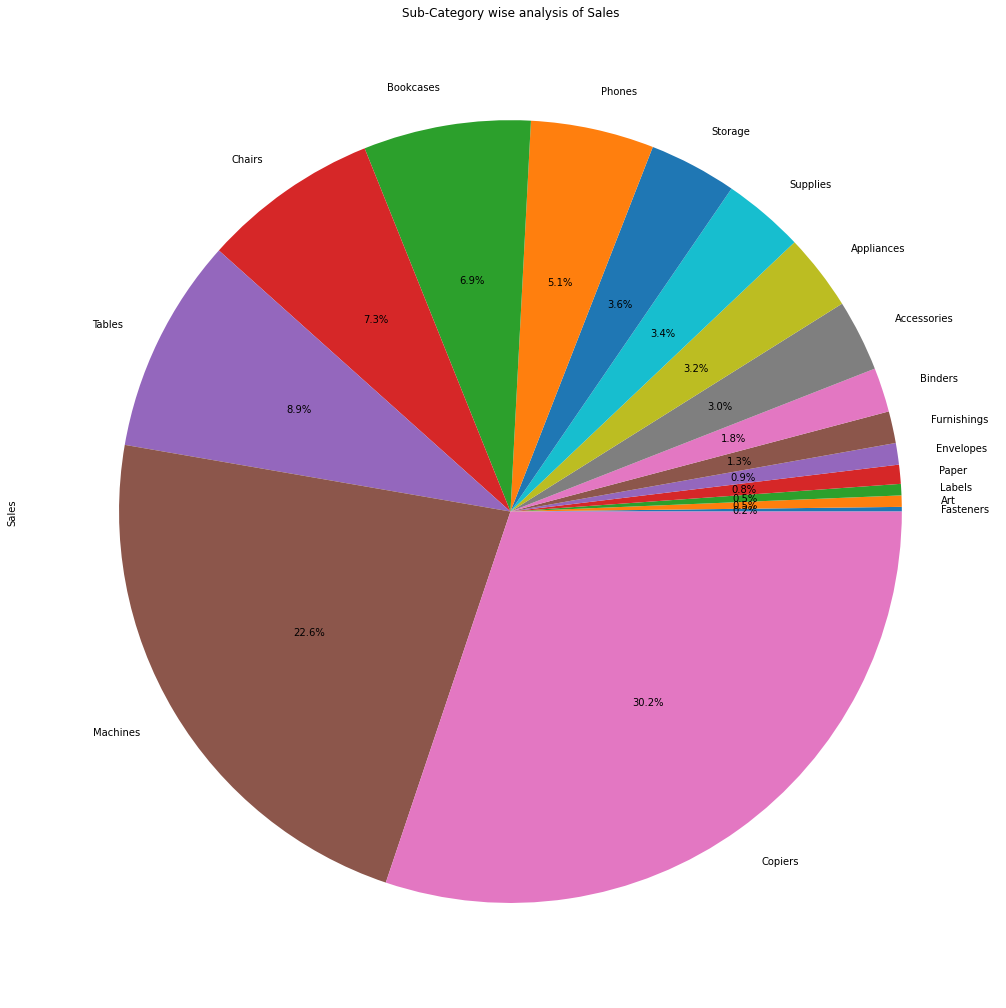

In [ ]:
SubCategory_data1['Sales'].plot(kind='pie',figsize = (18,18), autopct='%1.1f%%')
plt.title('Sub-Category wise analysis of Sales')

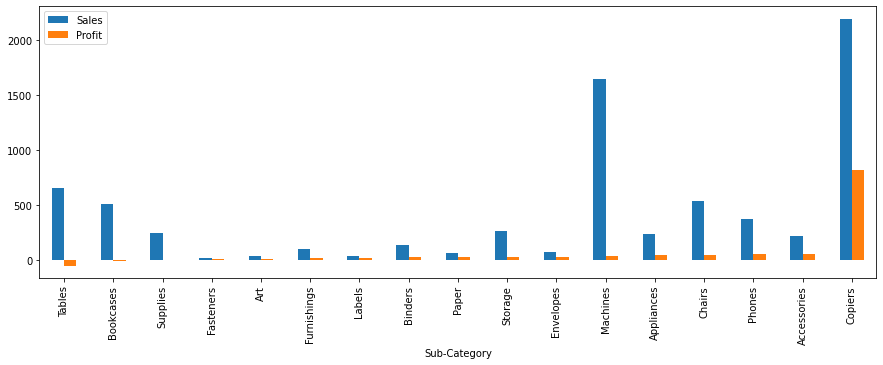

In [ ]:
SubCategory_data2[['Sales', 'Profit']].plot(kind = 'bar', figsize = (15,5))

In [ ]:
Region_data = dat.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
Region_data

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


Text(0.5, 1.0, 'Region wise analysis of Sales, Discount, Profit')

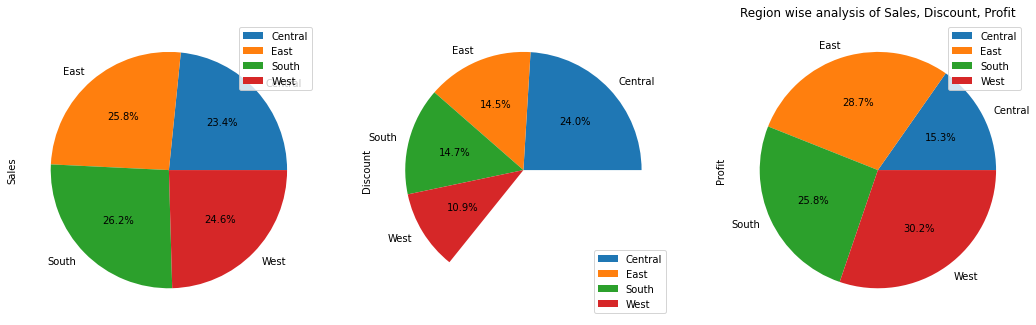

In [ ]:
Region_data.plot.pie(subplots = True, autopct='%1.1f%%', figsize = (18, 20), labels= Region_data.index)
plt.title('Region wise analysis of Sales, Discount, Profit')

In [ ]:
Shipmode_data = dat.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
Shipmode_data

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


Text(0.5, 1.0, 'Ship Mode wise analysis of Sales, Discount, Profit')

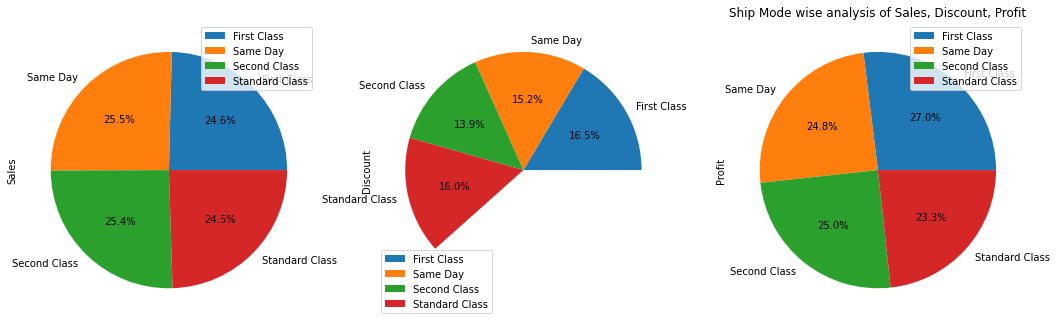

In [ ]:
Shipmode_data.plot.pie(subplots = True, autopct='%1.1f%%', figsize = (18, 20), labels= Shipmode_data.index)
plt.title('Ship Mode wise analysis of Sales, Discount, Profit')